In [1]:
# pip install torch torchvision matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 필요한 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# 하드웨어 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# 데이터 전처리
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 크기를 조정
    transforms.CenterCrop((64, 64)),  # 중심을 기준으로 크롭 (추천: 64x64)
    transforms.ToTensor(),           # Tensor로 변환
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])


In [5]:
# 데이터 로드
train_data = datasets.ImageFolder(root="./data/train", transform=transform)
valid_data = datasets.ImageFolder(root="./data/valid", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)


In [6]:
def forward(self, x):
    x = self.conv_layers(x)
    print(f"CNN Output Shape: {x.shape}")  # CNN 출력 크기 확인
    x = x.view(x.size(0), -1)
    x = self.fc_layers(x)
    return x


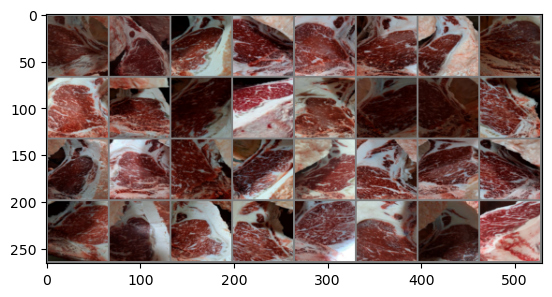

Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [8]:
import torchvision
# 이미지 시각화 함수
def imshow(img):
    # 정규화를 다시 되돌림
    img = img / 2 + 0.5  # mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] 복원
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # (C, H, W) -> (H, W, C)
    plt.show()

# 데이터 확인
data_iter = iter(valid_loader)
images, labels = next(data_iter)

# 이미지를 격자로 배치하고 출력
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

In [9]:
print(f"Train dataset size: {len(train_data)}")
print(f"Validation dataset size: {len(valid_data)}")


Train dataset size: 4179
Validation dataset size: 4500


In [10]:
images, labels = next(iter(train_loader))
print(f"Sample batch shape: {images.shape}, Labels: {labels}")


Sample batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([2, 2, 1, 4, 1, 0, 1, 0, 2, 1, 4, 2, 1, 3, 3, 3, 4, 2, 2, 0, 0, 2, 0, 3,
        0, 0, 0, 2, 3, 0, 1, 4])


In [21]:
# 데이터 전처리
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # 크기를 먼저 늘림
    transforms.CenterCrop((64, 64)),  # 중심 크롭
    transforms.ToTensor(),  # Tensor 변환
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])

# 데이터 로드
train_data = datasets.ImageFolder(root="./data/train", transform=transform)
valid_data = datasets.ImageFolder(root="./data/valid", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

# CNN 모델 정의
class BeefClassifier(nn.Module):
    def __init__(self):
        super(BeefClassifier, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),  # CNN 출력 크기에 맞게 수정
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, len(train_data.classes))
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

model = BeefClassifier().to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 실행
train_loss, valid_loss, train_acc, valid_acc = train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10)

# 학습 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Valid Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(valid_acc, label='Valid Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch [1/10]
Train Loss: 1.4420, Train Accuracy: 29.27%
Valid Loss: 1.3611, Valid Accuracy: 32.60%
Epoch [2/10]
Train Loss: 1.3814, Train Accuracy: 31.95%
Valid Loss: 1.3310, Valid Accuracy: 27.16%


KeyboardInterrupt: 

## 크롭 크기 (64,64) 진행했을 경우
  Epoch [1/10]
  
  Train Loss: 1.4420, Train Accuracy: 29.27%

  Valid Loss: 1.3611, Valid Accuracy: 32.60%

  Epoch [2/10]

  Train Loss: 1.3814, Train Accuracy: 31.95%
  
  Valid Loss: 1.3310, Valid Accuracy: 27.16%


## 대처 방안
- 크롭 크기 조정: (96, 96) 또는 (128, 128)로 확대.
- 학습률 조정: 0.0001 또는 0.005로 실험.

------------------------------------------------------------------------------------------------

# 변경 사항
- 데이터 증강 적용
- Dropout 비율 증가
- 학습률 감소
- 사전학습된 모델을 활용(ResNet-18)

c:\Users\COM\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\COM\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\COM/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 24.5MB/s]


Epoch [1/10]
Train Loss: 1.4703, Train Accuracy: 29.96%
Valid Loss: 1.2842, Valid Accuracy: 38.71%
Epoch [2/10]
Train Loss: 1.3363, Train Accuracy: 36.25%
Valid Loss: 1.2283, Valid Accuracy: 43.53%
Epoch [3/10]
Train Loss: 1.2410, Train Accuracy: 42.98%
Valid Loss: 1.1830, Valid Accuracy: 46.60%
Epoch [4/10]
Train Loss: 1.1575, Train Accuracy: 48.50%
Valid Loss: 1.1728, Valid Accuracy: 44.47%
Epoch [5/10]
Train Loss: 1.0568, Train Accuracy: 55.32%
Valid Loss: 1.1108, Valid Accuracy: 52.20%
Epoch [6/10]
Train Loss: 0.9491, Train Accuracy: 61.69%
Valid Loss: 1.0571, Valid Accuracy: 54.40%
Epoch [7/10]
Train Loss: 0.8391, Train Accuracy: 67.38%
Valid Loss: 1.1689, Valid Accuracy: 53.89%
Epoch [8/10]
Train Loss: 0.7374, Train Accuracy: 71.84%
Valid Loss: 0.9696, Valid Accuracy: 62.27%
Epoch [9/10]
Train Loss: 0.6179, Train Accuracy: 77.03%
Valid Loss: 0.9987, Valid Accuracy: 62.31%
Epoch [10/10]
Train Loss: 0.5344, Train Accuracy: 80.40%
Valid Loss: 1.0727, Valid Accuracy: 63.73%


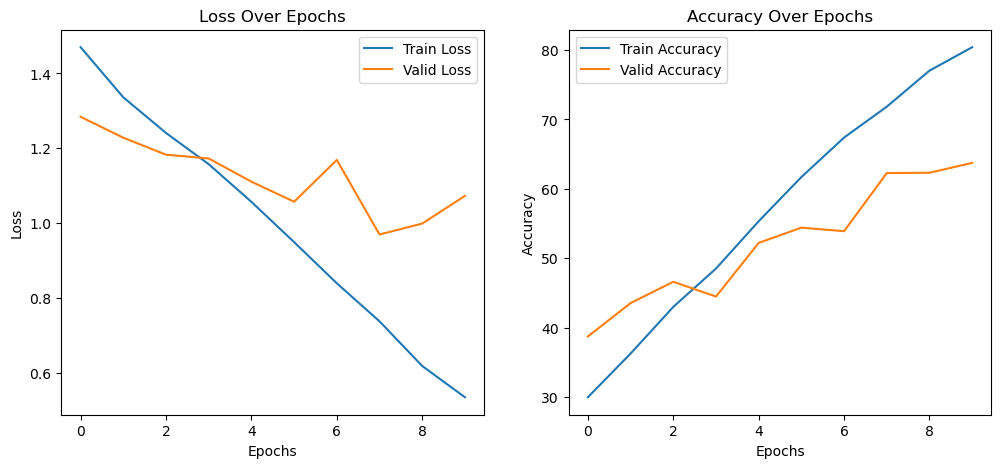

In [22]:
# 필요한 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

# 하드웨어 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 전처리 (데이터 증강 적용)
transform_train = transforms.Compose([
    transforms.Resize((150, 150)),                # 크기를 먼저 늘림
    transforms.CenterCrop((128, 128)),            # 중심 크롭
    transforms.RandomHorizontalFlip(),            # 좌우 반전
    transforms.RandomRotation(15),               # 랜덤 회전
    transforms.ColorJitter(brightness=0.2,       # 밝기 조정
                           contrast=0.2,
                           saturation=0.2,
                           hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])

transform_valid = transforms.Compose([
    transforms.Resize((150, 150)),  # 크기를 먼저 늘림
    transforms.CenterCrop((128, 128)),  # 중심 크롭
    transforms.ToTensor(),  # Tensor 변환
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])

# 데이터 로드
train_data = datasets.ImageFolder(root="./data/train", transform=transform_train)
valid_data = datasets.ImageFolder(root="./data/valid", transform=transform_valid)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

# 사전 학습된 모델 (ResNet-18) 로드 및 수정
class FineTunedResNet(nn.Module):
    def __init__(self, num_classes):
        super(FineTunedResNet, self).__init__()
        self.base_model = models.resnet18(pretrained=True)  # ResNet-18 로드
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.6),  # Dropout 비율 증가
            nn.Linear(256, num_classes)  # 출력 크기 변경
        )

    def forward(self, x):
        return self.base_model(x)

model = FineTunedResNet(num_classes=len(train_data.classes)).to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 학습률 감소

# 학습 및 검증 함수 정의
def train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss_list.append(train_loss / len(train_loader))
        train_acc_list.append(100. * correct / total)

        # Validation
        model.eval()
        valid_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        valid_loss_list.append(valid_loss / len(valid_loader))
        valid_acc_list.append(100. * correct / total)

        print(f"Epoch [{epoch+1}/{epochs}]\n"
              f"Train Loss: {train_loss_list[-1]:.4f}, Train Accuracy: {train_acc_list[-1]:.2f}%\n"
              f"Valid Loss: {valid_loss_list[-1]:.4f}, Valid Accuracy: {valid_acc_list[-1]:.2f}%",
              flush=True)

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

# 학습 실행
train_loss, valid_loss, train_acc, valid_acc = train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10)

# 학습 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Valid Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(valid_acc, label='Valid Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# 현재 머신러닝 환경
### 사용된 데이터의 갯수

- Train dataset size: 4179
- Validation dataset size: 4500

### 데이터 전처리 과정

- 데이터 증강 적용(이미지 확대, 중앙부분 크롭, 밝기조정, 랜덤 회전각 부여)
- Dropout 비율 증가
- 학습률 감소
- 사전학습된 모델을 활용(ResNet-18)
--------------------------------------

# 1번째 에포크 값
- Train Accuracy : 29.96%
- Valid Accuracy : 38.71%

=> 소고기의 등급(class의 갯수)은 총 5개. 무작위로 선택할경우 정답일 확률은 약 20%지만 모델이 학습을 시작했다는 의미로 해석가능.

# 5번째 에포크 값
- Train Accuracy : 55.32% (약 20% 상승)
- Valid Accuracy : 52.20% (약 10% 상승)

=> 과적합의 징후가 있었지만, 모델은 여전히 유의미한 학습을 하고있다는 의미로 해석가능.

----------------------

# 정확도 50% 돌파 목표를 5번째 에포크만에 달성함!
- 현재 사용된 이미지의 갯수를 고려하면 실제 훈련데이터와 검증데이터를 사용할 경우 성능 대폭 향상을 시사함.
- 전처리 방법에 따라 최대 정확도 75~80%까지 충분히 기대할 수 있음.
---------------------------

# 최종 에포크 값
- Train Accuracy : 80.40% (약 50% 상승)
- Valid Accuracy : 63.73% (약 25% 상승)

=> 초반의 목표였던 정확도 50%의 값을 훨씬 웃도는 값으로 마무리지음.

#추가 학습 계획!
- 이미지 데이터 추가 및 전처리, 학습률 등은 현재와 동일하게 유지.

In [23]:
import torch

# 모델과 옵티마이저 저장 함수
def save_checkpoint(model, optimizer, epoch, filepath="model_checkpoint.pth"):
    checkpoint = {
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
    }
    torch.save(checkpoint, filepath)
    print(f"Checkpoint saved at epoch {epoch} to {filepath}")


In [24]:
# 학습이 끝난 후 저장
save_checkpoint(model, optimizer, epoch=10, filepath="final_model_checkpoint.pth")


Checkpoint saved at epoch 10 to final_model_checkpoint.pth


In [ ]:
# 모델과 옵티마이저 불러오기 함수
def load_checkpoint(filepath, model, optimizer):
    checkpoint = torch.load(filepath)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    start_epoch = checkpoint["epoch"] + 1  # 이어서 학습하기 위해 다음 에포크로 설정
    print(f"Checkpoint loaded. Resuming training from epoch {start_epoch}")
    return model, optimizer, start_epoch


In [ ]:
# 모델 불러오기
model, optimizer, start_epoch = load_checkpoint("final_model_checkpoint.pth", model, optimizer)

# 이어서 학습
for epoch in range(start_epoch, total_epochs):
    # 학습 루프...
    pass
